## **Cleaning Airbnb Data in Python**


The majority of data science work often revolves around pre-processing data, and making sure it's ready for analysis.

* Import data into `pandas`, and use simple functions to diagnose problems in our data.
* Visualize missing and out of range data using `missingno` and `seaborn`.
* Apply a range of data cleaning tasks that will ensure the delivery of accurate insights.

## **The Dataset**

The dataset to be used is a CSV file named `airbnb.csv`, which contains data on airbnb listings in the state of New York. It contains the following columns:

- `listing_id`: The unique identifier for a listing
- `description`: The description used on the listing
- `host_id`: Unique identifier for a host
- `host_name`: Name of host
- `neighbourhood_full`: Name of boroughs and neighbourhoods
- `coordinates`: Coordinates of listing _(latitude, longitude)_
- `Listing added`: Date of added listing
- `room_type`: Type of room 
- `rating`: Rating from 0 to 5.
- `price`: Price per night for listing
- `number_of_reviews`: Amount of reviews received 
- `last_review`: Date of last review
- `reviews_per_month`: Number of reviews per month
- `availability_365`: Number of days available per year
- `Number of stays`: Total number of stays thus far


## **Getting started**

In [0]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
import missingno as msno
import datetime as dt

In [0]:
# Read in the dataset
airbnb = pd.read_csv('https://github.com/adelnehme/python-for-spreadsheet-users-webinar/blob/master/datasets/airbnb.csv?raw=true', index_col = 'Unnamed: 0')

## **Diagnosing data cleaning problems using simple `pandas` and visualizations** 

Some important and common methods needed to get a better understanding of DataFrames and diagnose potential data problems are the following: 

- `.head()` prints the header of a DataFrame
- `.dtypes` prints datatypes of all columns in a DataFrame
- `.info()` provides a bird's eye view of column data types and missing values in a DataFrame
- `.describe()` returns a distribution of numeric columns in your DataFrame
- `.isna().sum()` allows us to break down the number of missing values per column in our DataFrame
- `.unique()` finds the number of unique values in a DataFrame column

<br>

- `sns.displot()` plots the distribution of one column in your DataFrame.

In [73]:
# Print the header of the DataFrame
# head() is a method

airbnb.head()

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


In [70]:
# Print data types of DataFrame
# dtypes is an attribute - do not end w a parentheses

airbnb.dtypes

listing_id                    int64
name                         object
host_id                       int64
host_name                    object
room_type                    object
price                       float64
number_of_reviews             int64
last_review          datetime64[ns]
reviews_per_month           float64
availability_365              int64
rating                      float64
number_of_stays             float64
5_stars                     float64
listing_added        datetime64[ns]
latitude                    float64
longitude                   float64
borough                      object
neighbourhood                object
is_rated                      int64
dtype: object

coordinates, price - they are objects, convert them to numeric.

date should be converted to datetime

In [74]:
# Print info of DataFrame
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10019 entries, 0 to 10018
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   listing_id          10019 non-null  int64  
 1   name                10014 non-null  object 
 2   host_id             10019 non-null  int64  
 3   host_name           10017 non-null  object 
 4   neighbourhood_full  10019 non-null  object 
 5   coordinates         10019 non-null  object 
 6   room_type           10019 non-null  object 
 7   price               9781 non-null   object 
 8   number_of_reviews   10019 non-null  int64  
 9   last_review         7944 non-null   object 
 10  reviews_per_month   7944 non-null   float64
 11  availability_365    10019 non-null  int64  
 12  rating              7944 non-null   float64
 13  number_of_stays     7944 non-null   float64
 14  5_stars             7944 non-null   float64
 15  listing_added       10019 non-null  object 
dtypes: f

In [75]:
# Print number of missing values
airbnb.isna().sum()

listing_id               0
name                     5
host_id                  0
host_name                2
neighbourhood_full       0
coordinates              0
room_type                0
price                  238
number_of_reviews        0
last_review           2075
reviews_per_month     2075
availability_365         0
rating                2075
number_of_stays       2075
5_stars               2075
listing_added            0
dtype: int64

There are a variety of ways of dealing with missing data that is dependent on type of missingness, as well as the business assumptions behind our data - our options could be:

- Dropping missing data (if the data dropped does not impact or skew our data)
- Setting to missing and impute with statistical measures (median, mean, mode ...)
- Imputing with more complex algorithmic/machine learning based approaches
- Impute based on business assumptions of our data

In [76]:
# Print description of DataFrame
airbnb.describe()

,listing_id,host_id,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars
count,1.001900e+04,1.001900e+04,10019.000000,7944.000000,10019.000000,7944.000000,7944.000000,7944.000000
mean,1.927634e+07,6.795923e+07,22.459727,1.353894,112.284260,4.014458,33.991541,0.718599
std,1.095056e+07,7.863106e+07,43.173896,1.615380,131.636043,0.575064,56.089279,0.079978
min,3.831000e+03,2.787000e+03,0.000000,0.010000,0.000000,3.000633,1.200000,0.600026
25%,9.674772e+06,7.910880e+06,1.000000,0.200000,0.000000,3.520443,3.600000,0.655576
50%,2.007030e+07,3.165167e+07,5.000000,0.710000,44.000000,4.027965,10.800000,0.709768
75%,2.933864e+07,1.074344e+08,22.000000,2.000000,226.000000,4.516378,38.400000,0.763978
max,3.648724e+07,2.741034e+08,510.000000,16.220000,365.000000,5.181114,612.000000,0.950339


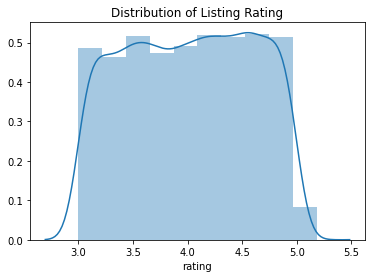

In [77]:
# Visualize the distribution of the rating column

sns.distplot(airbnb['rating'], bins=10)
plt.title('Distribution of Listing Rating')
plt.show()

In [78]:
# Find number of unique values in room_type column
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

In [79]:
# How many values of different room_types do we have?
airbnb.room_type.value_counts()

Entire home/apt         5120
Private room            4487
Shared room              155
Private                   89
   Shared room            71
home                      66
PRIVATE ROOM              31
Name: room_type, dtype: int64

<br>

## **To do list:**

_Data type problems:_

- **Task 1**: Split `coordinates` into 2 columns and convert them to `float`
- **Task 2**: Remove `$` from `price` and convert it to `float`
- **Task 3**: Convert `listing_added` and `last_review` to `datetime`

<br>

_Text/categorical data problems:_

- **Task 4**: We need to collapse `room_type` into correct categories
- **Task 5**: Divide `neighbourhood_full` into 2 columns and making sure they are clean

<br>

_Data range problems:_

- **Task 6**: Make sure we set the correct maximum for `rating` column out of range values

<br>

_Dealing with missing data:_

- **Task 7**: Understand the type of missingness, and deal with the missing data in most of the remaining columns. 

<br>

_Further_

- Investigate if there are duplicates in data
- Sanity checks on DataFrame 

<br>

## **Cleaning data** 

### Data type problems

In [80]:
# Reminder of the DataFrame
airbnb.head()

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


##### **Task 1:** Replace `coordinates` with `latitude` and `longitude` columns

To perform this task, we will use the following methods:

- `.str.replace("","")` replaces one string in each row of a column with another
- `.str.split("")` takes in a string and lets you split a column into two based on that string
- `.astype()` lets you convert a column from one type to another

In [81]:
# Remove "(" and ")" from coordinates
airbnb['coordinates'] = airbnb['coordinates'].str.replace("(","")
airbnb['coordinates'] = airbnb['coordinates'].str.replace(")","")

# Print the header of the column
airbnb['coordinates'].head()

0    40.63222, -73.93398
1    40.78761, -73.96862
2     40.7007, -73.99517
3    40.79169, -73.97498
4    40.71884, -73.98354
Name: coordinates, dtype: object

In [82]:
# Split column into two

lat_long = airbnb['coordinates'].str.split(',', expand=True)
lat_long.head()

,0,1
0,40.63222,-73.93398
1,40.78761,-73.96862
2,40.7007,-73.99517
3,40.79169,-73.97498
4,40.71884,-73.98354


In [83]:
# Assign correct columns to latitude and longitude columns in airbnb
airbnb['latitude'] = lat_long[0]
airbnb['longitude'] = lat_long[1]

# Print the header and confirm new column creation
airbnb.head()

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","40.63222, -73.93398",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","40.78761, -73.96862",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","40.7007, -73.99517",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.7007,-73.99517
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","40.79169, -73.97498",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","40.71884, -73.98354",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354


In [84]:
# Print out dtypes again
airbnb.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude               object
longitude              object
dtype: object

In [85]:
# Convert latitude and longitude to float
airbnb['latitude'] = airbnb['latitude'].astype('float')
airbnb['longitude'] = airbnb['longitude'].astype('float')

# Print dtypes again
airbnb.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude              float64
longitude             float64
dtype: object

In [0]:
# Drop coordinates column
airbnb.drop('coordinates', axis=1, inplace=True)

##### **Task 2:** Remove `$` from `price` and convert it to `float`

To perform this task, we will be using the following methods:

- `.str.strip()` which removes a specified string from each row in a column
- `.astype()`

In [87]:
# Remove $ from price before conversion to float
airbnb['price'] = airbnb['price'].str.strip('$')

# Print header to make sure change was done
airbnb['price'].head()

0     45
1    135
2    150
3     86
4    160
Name: price, dtype: object

In [88]:
# Convert price to float
airbnb['price'] = airbnb['price'].astype('float')

# Calculate mean of price after conversion
airbnb.price.mean()

150.90512217564665

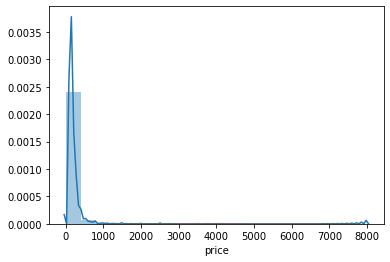

In [89]:
# Visualize distribution of prices
sns.distplot(airbnb['price'], bins=20)
plt.show()

##### **Task 3:** Convert `listing_added` and `last_review` columns to `datetime`

To perform this task, we will use the following functions:

- `pd.to_datetime(format = "")`
  - `format` takes in the desired date format `"%Y-%m-%d"`

In [90]:
# Print header of two columns
airbnb[['listing_added', 'last_review']].head()

,listing_added,last_review
0,2018-06-08,2018-12-12
1,2018-12-25,2019-06-30
2,2018-08-15,NaN
3,2017-03-20,2017-09-23
4,2020-10-23,2019-06-12


In [0]:
# Convert both columns to datetime
airbnb['listing_added'] = pd.to_datetime(airbnb['listing_added'], format = '%Y-%m-%d')
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'], format = '%Y-%m-%d')

In [92]:
# Print header and datatypes of both columns again
print(airbnb[['listing_added', 'last_review']].head())
print(airbnb[['listing_added', 'last_review']].dtypes)

  listing_added last_review
0    2018-06-08  2018-12-12
1    2018-12-25  2019-06-30
2    2018-08-15         NaT
3    2017-03-20  2017-09-23
4    2020-10-23  2019-06-12
listing_added    datetime64[ns]
last_review      datetime64[ns]
dtype: object


### Text and categorical data problems

##### **Task 4:** We need to collapse `room_type` into correct categories

To perform this task, we will be using the following methods:

- `.str.lower()` to lowercase all rows in a string column
- `.str.strip()` to remove all white spaces of each row in a string column
- `.replace()` to replace values in a column with another

In [93]:
# Print unique values of `room_type`
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

In [94]:
# Deal with capitalized values
airbnb['room_type'] = airbnb['room_type'].str.lower()
airbnb['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home', '   shared room      '], dtype=object)

In [95]:
# Deal with trailing spaces
airbnb['room_type'] = airbnb['room_type'].str.strip()
airbnb['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home'], dtype=object)

In [96]:
# Replace values to 'Shared room', 'Entire place', 'Private room' and 'Hotel room' (if applicable).

mappings = {"private room": "Private Room",
            "private": "Private Room",
            "entire home/apt": "Entire Place",
            "shared room": "Shared Room",
            "home": "Entire Place"}

# Replace values and collapse data
airbnb['room_type'] = airbnb['room_type'].replace(mappings)
airbnb['room_type'].unique()

array(['Private Room', 'Entire Place', 'Shared Room'], dtype=object)

##### **Task 5:** Divide `neighbourhood_full` into 2 columns and making sure they are clean

In [97]:
# Print header of column
airbnb['neighbourhood_full'].head()

0           Brooklyn, Flatlands
1    Manhattan, Upper West Side
2    Brooklyn, Brooklyn Heights
3    Manhattan, Upper West Side
4    Manhattan, Lower East Side
Name: neighbourhood_full, dtype: object

In [98]:
# Split neighbourhood_full
borough_neighbourhood = airbnb['neighbourhood_full'].str.split(',', expand=True)
borough_neighbourhood.head()

,0,1
0,Brooklyn,Flatlands
1,Manhattan,Upper West Side
2,Brooklyn,Brooklyn Heights
3,Manhattan,Upper West Side
4,Manhattan,Lower East Side


In [99]:
# Create borough and neighbourhood columns
airbnb['borough'] = borough_neighbourhood[0]
airbnb['neighbourhood'] = borough_neighbourhood[1]

# Print header of columns
airbnb[['neighbourhood_full', 'borough', 'neighbourhood']].head()

,neighbourhood_full,borough,neighbourhood
0,"Brooklyn, Flatlands",Brooklyn,Flatlands
1,"Manhattan, Upper West Side",Manhattan,Upper West Side
2,"Brooklyn, Brooklyn Heights",Brooklyn,Brooklyn Heights
3,"Manhattan, Upper West Side",Manhattan,Upper West Side
4,"Manhattan, Lower East Side",Manhattan,Lower East Side


In [0]:
# Drop neighbourhood_full column
# axis = 1 specifies it's a column
airbnb.drop('neighbourhood_full', axis=1, inplace=True)

In [101]:
# Print out unique values of borough and neighbourhood
print(airbnb['borough'].unique())
print(airbnb['neighbourhood'].unique())

['Brooklyn' 'Manhattan' 'Queens' 'Bronx' 'Staten Island']
[' Flatlands' ' Upper West Side' ' Brooklyn Heights' ' Lower East Side'
 ' Greenwich Village' ' Harlem' ' Sheepshead Bay' ' Theater District'
 ' Bushwick' ' Laurelton' ' Mott Haven' ' Flushing' ' Crown Heights'
 ' Midtown' ' Financial District' ' East Village' ' Park Slope'
 ' Washington Heights' ' Williamsburg' ' Chelsea' ' Bedford-Stuyvesant'
 ' Gowanus' ' Upper East Side' ' Ditmars Steinway' ' Cypress Hills'
 " Hell's Kitchen" ' Ridgewood' ' Marble Hill' ' Kips Bay'
 ' Prospect Heights' ' East New York' ' Concord' ' Stapleton' ' Astoria'
 ' East Harlem' ' Sunnyside' ' Gramercy' ' Prospect-Lefferts Gardens'
 ' Sunset Park' ' Forest Hills' ' Windsor Terrace' ' Clinton Hill'
 ' Murray Hill' ' Flatiron District' ' Greenpoint' ' East Flatbush'
 ' Tribeca' ' Woodhaven' ' Fort Greene' ' Inwood' ' Chinatown'
 ' Rockaway Beach' ' Woodside' ' Bayside' ' Bensonhurst' ' SoHo'
 ' Red Hook' ' West Village' ' South Slope' ' Richmond Hill' '

In [102]:
# Strip white space from neighbourhood column
airbnb['neighbourhood'] = airbnb['neighbourhood'].str.strip()

# Print unique values again
airbnb['neighbourhood'].unique()

array(['Flatlands', 'Upper West Side', 'Brooklyn Heights',
       'Lower East Side', 'Greenwich Village', 'Harlem', 'Sheepshead Bay',
       'Theater District', 'Bushwick', 'Laurelton', 'Mott Haven',
       'Flushing', 'Crown Heights', 'Midtown', 'Financial District',
       'East Village', 'Park Slope', 'Washington Heights', 'Williamsburg',
       'Chelsea', 'Bedford-Stuyvesant', 'Gowanus', 'Upper East Side',
       'Ditmars Steinway', 'Cypress Hills', "Hell's Kitchen", 'Ridgewood',
       'Marble Hill', 'Kips Bay', 'Prospect Heights', 'East New York',
       'Concord', 'Stapleton', 'Astoria', 'East Harlem', 'Sunnyside',
       'Gramercy', 'Prospect-Lefferts Gardens', 'Sunset Park',
       'Forest Hills', 'Windsor Terrace', 'Clinton Hill', 'Murray Hill',
       'Flatiron District', 'Greenpoint', 'East Flatbush', 'Tribeca',
       'Woodhaven', 'Fort Greene', 'Inwood', 'Chinatown',
       'Rockaway Beach', 'Woodside', 'Bayside', 'Bensonhurst', 'SoHo',
       'Red Hook', 'West Village', 

##### **Task 6:** Make sure we set the correct maximum for `rating` column out of range values

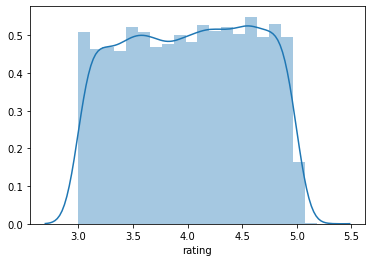

In [103]:
# Visualize the rating column again
sns.distplot(airbnb['rating'], bins=20)
plt.show()

In [104]:
# Isolate rows of rating > 5.0
airbnb[airbnb['rating'] > 5.0]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood
1925,36411407,Brand new 1 bedroom steps from Soho!,33917435,Mike,Entire Place,150.0,1,2019-07-06,1.0,13,5.017040,1.2,0.870161,2018-12-31,40.71825,-73.99019,Manhattan,Lower East Side
6732,36390226,Comfortable clean Bedstuy private room,267932490,Angela,Private Room,45.0,2,2019-07-08,2.0,14,5.087091,2.4,0.950339,2019-01-02,40.69551,-73.93951,Brooklyn,Bedford-Stuyvesant
8821,36413632,Spacious 2BR in Beautiful Brooklyn Heights,6608220,Matt,Entire Place,550.0,1,2019-07-07,1.0,230,5.181114,1.2,0.805418,2019-01-01,40.69827,-73.99649,Brooklyn,Brooklyn Heights


In [105]:
airbnb[airbnb['rating'] > 5.0].index

Int64Index([1925, 6732, 8821], dtype='int64')

In [0]:
# Drop these rows and make sure we have effected changes
airbnb.drop(airbnb[airbnb['rating'] > 5.0].index, inplace=True, axis=0)

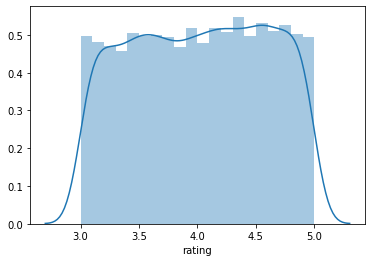

In [107]:
# Visualize the rating column again
sns.distplot(airbnb['rating'], bins=20)
plt.show()

In [108]:
# Get the maximum
airbnb.rating.max()

4.999561104773598

## **Q&A**

### Dealing with missing data

The `missingno` (imported as `msno`) package is great for visualizing missing data - we will be using:

- `msno.matrix()` visualizes a missingness matrix
- `msno.bar()` visualizes a missngness barplot
- `plt.show()` to show the plot

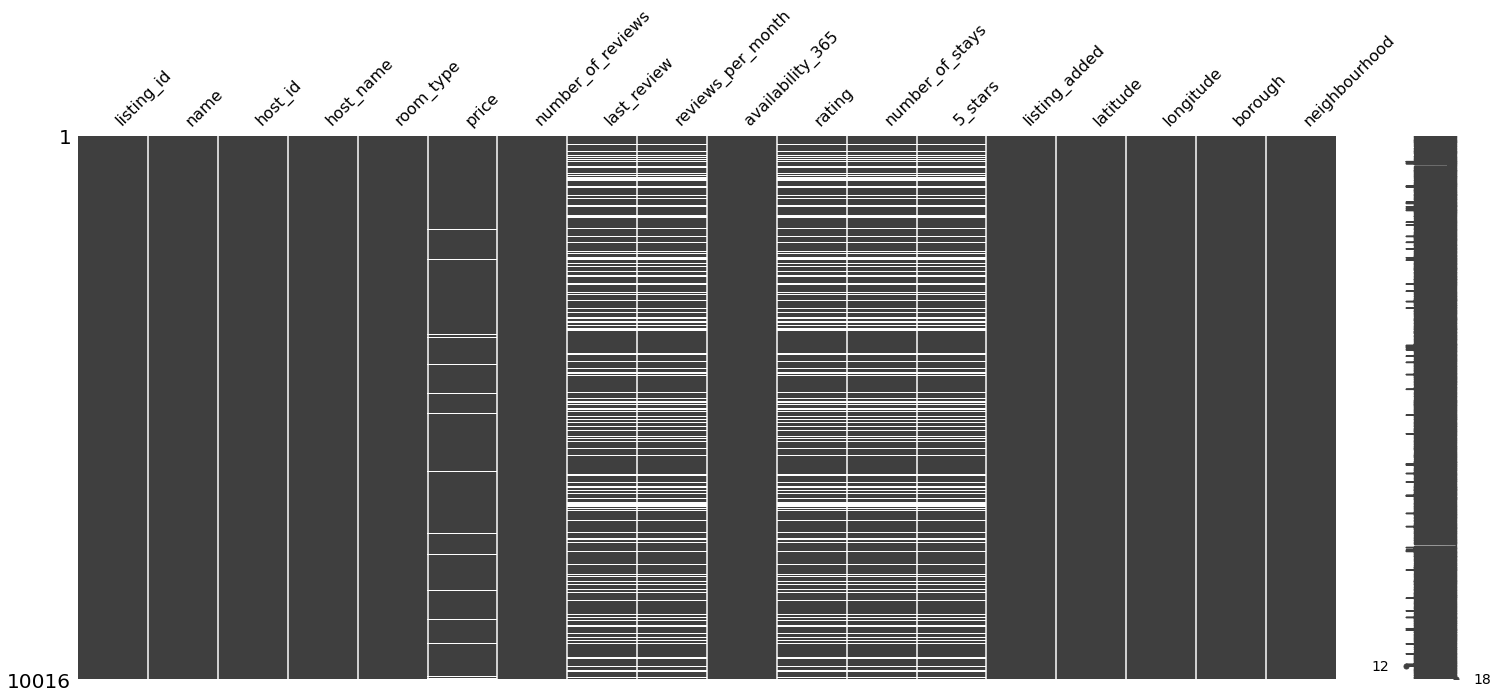

In [109]:
# Visualize the missingness 
msno.matrix(airbnb)
plt.show()

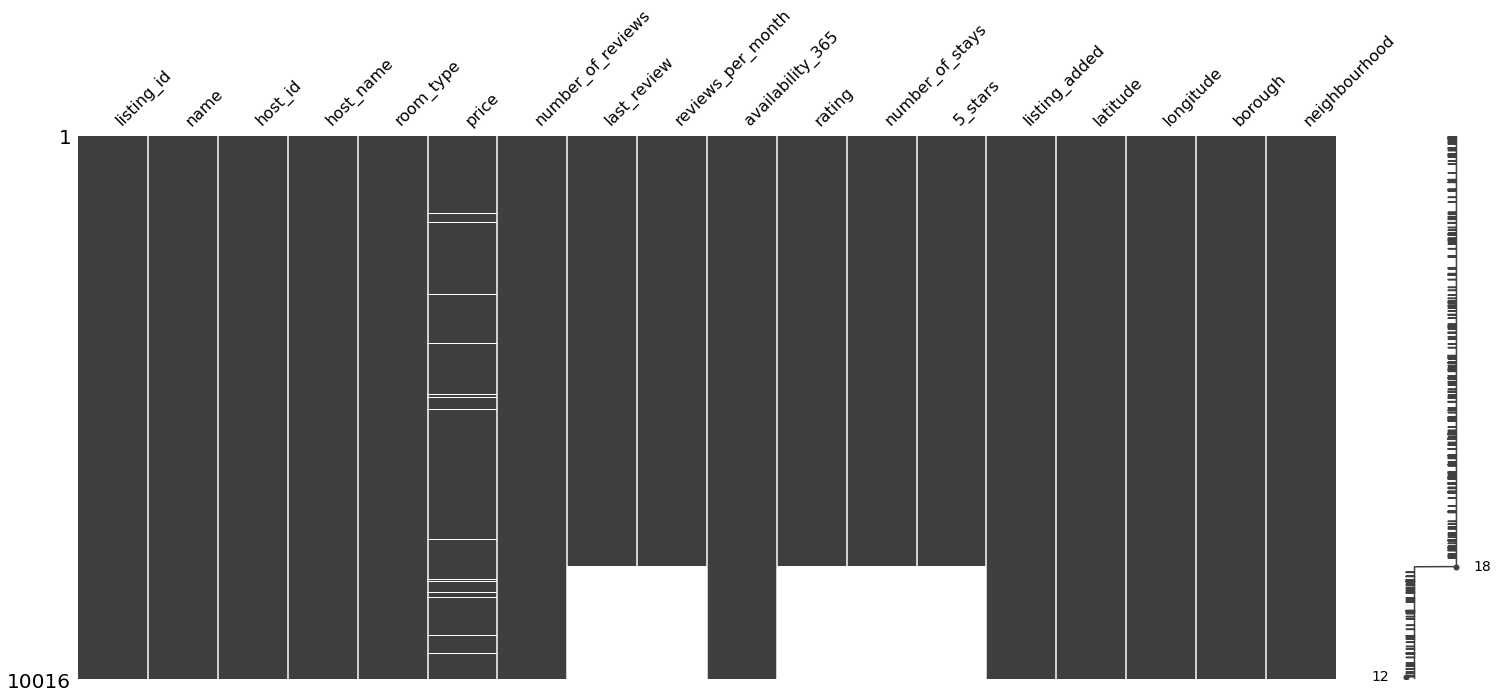

In [110]:
# Visualize the missingness on sorted values
msno.matrix(airbnb.sort_values(by='rating'))
plt.show()

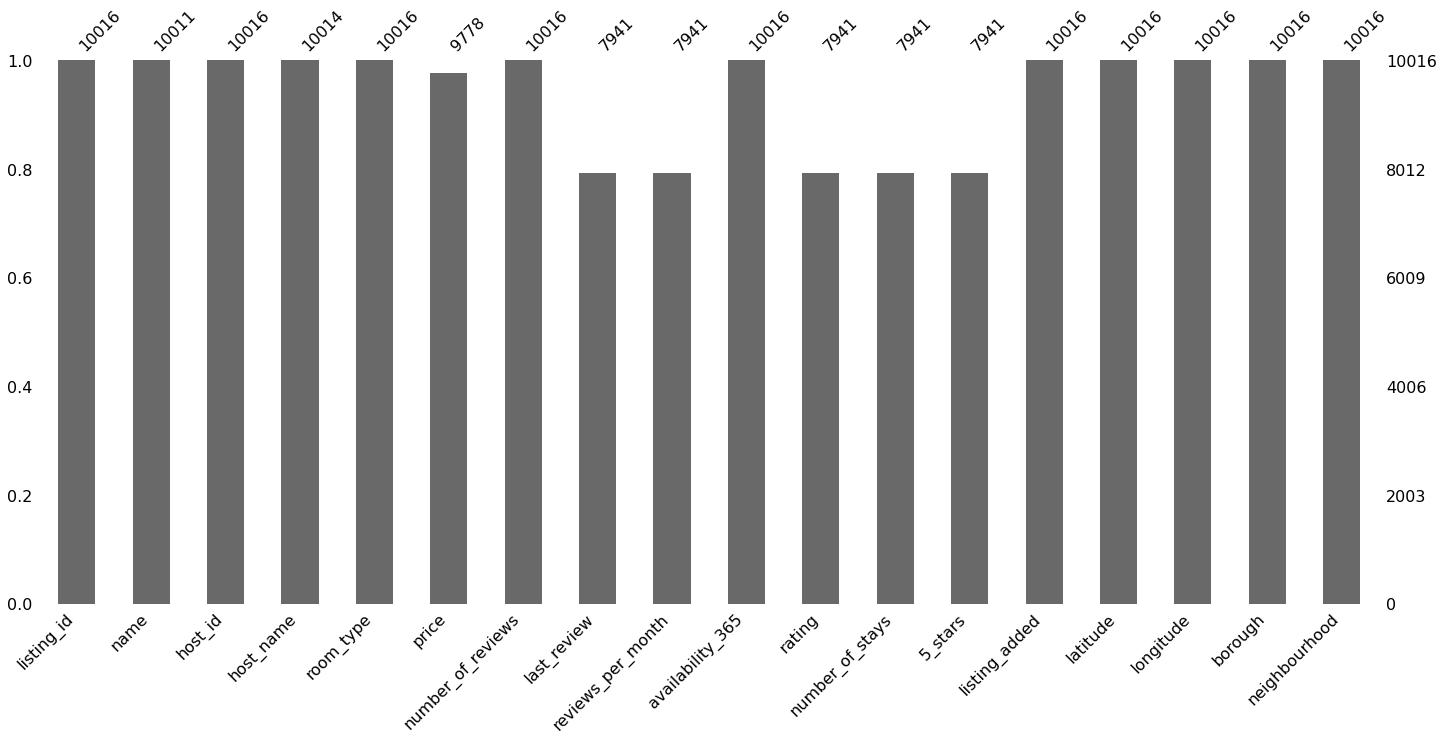

In [111]:
# Missingness barplot
msno.bar(airbnb)

**Treating the** `rating`, `number_of_stays`, `5_stars`, `reviews_per_month` **columns**

In [112]:
# Understand DataFrame with missing values in rating, number_of_stays, 5_stars, reviews_per_month
airbnb[airbnb['rating'].isna()].describe()

,listing_id,host_id,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars,latitude,longitude
count,2.075000e+03,2.075000e+03,2028.000000,2075.0,0.0,2075.000000,0.0,0.0,0.0,2075.000000,2075.000000
mean,2.274238e+07,8.022455e+07,191.553748,0.0,NaN,104.531566,NaN,NaN,NaN,40.732074,-73.956771
std,1.123730e+07,8.663163e+07,316.186639,0.0,NaN,138.266525,NaN,NaN,NaN,0.051168,0.041065
min,6.358800e+04,1.475100e+04,0.000000,0.0,NaN,0.000000,NaN,NaN,NaN,40.527000,-74.209410
25%,1.232923e+07,1.224305e+07,70.000000,0.0,NaN,0.000000,NaN,NaN,NaN,40.697845,-73.985185
50%,2.345182e+07,4.040116e+07,120.000000,0.0,NaN,7.000000,NaN,NaN,NaN,40.727790,-73.960940
75%,3.400364e+07,1.333498e+08,205.250000,0.0,NaN,211.000000,NaN,NaN,NaN,40.763480,-73.939540
max,3.648724e+07,2.741034e+08,5250.000000,0.0,NaN,365.000000,NaN,NaN,NaN,40.911690,-73.727310


In [113]:
# Understand DataFrame with missing values in rating, number_of_stays, 5_stars, reviews_per_month
airbnb[~airbnb['rating'].isna()].describe()

,listing_id,host_id,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars,latitude,longitude
count,7.941000e+03,7.941000e+03,7750.000000,7941.000000,7941.000000,7941.000000,7941.000000,7941.000000,7941.000000,7941.000000,7941.000000
mean,1.836419e+07,6.474110e+07,140.230581,28.336482,1.353901,114.320111,4.014050,34.003778,0.718540,40.728335,-73.950632
std,1.068788e+07,7.606089e+07,163.630337,46.746949,1.615659,129.789313,0.574787,56.096338,0.079927,0.055491,0.047017
min,3.831000e+03,2.787000e+03,0.000000,1.000000,0.010000,0.000000,3.000633,1.200000,0.600026,40.508680,-74.239860
25%,8.964308e+06,7.138163e+06,69.000000,3.000000,0.200000,0.000000,3.519751,3.600000,0.655573,40.688560,-73.982130
50%,1.927436e+07,2.947846e+07,105.000000,9.000000,0.700000,54.000000,4.027415,10.800000,0.709747,40.721820,-73.954410
75%,2.787660e+07,1.016578e+08,170.000000,32.000000,2.000000,229.000000,4.515626,38.400000,0.763948,40.763390,-73.934930
max,3.635113e+07,2.733615e+08,8000.000000,510.000000,16.220000,365.000000,4.999561,612.000000,0.939950,40.913060,-73.719280


In [0]:
# Impute missing data
airbnb = airbnb.fillna({'reviews_per_month':0,
                        'number_of_stays':0,
                        '5_stars':0})



# Create is_rated column
is_rated = np.where(airbnb['rating'].isna() == True, 0,1)
airbnb['is_rated'] = is_rated

In [115]:
airbnb.isna().sum()

listing_id              0
name                    5
host_id                 0
host_name               2
room_type               0
price                 238
number_of_reviews       0
last_review          2075
reviews_per_month       0
availability_365        0
rating               2075
number_of_stays         0
5_stars                 0
listing_added           0
latitude                0
longitude               0
borough                 0
neighbourhood           0
is_rated                0
dtype: int64

**Treating the** `price` **column**

In [116]:
# Investigate DataFrame with missing values in price
airbnb[airbnb['price'].isna()].describe()

,listing_id,host_id,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars,latitude,longitude,is_rated
count,2.380000e+02,2.380000e+02,0.0,238.000000,238.000000,238.000000,191.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,1.805656e+07,6.262965e+07,NaN,22.445378,1.117563,98.953782,4.078343,26.934454,0.577721,40.727270,-73.946071,0.802521
std,1.065176e+07,7.518785e+07,NaN,35.798003,1.666262,125.872256,0.568705,42.957603,0.297066,0.057426,0.048688,0.398936
min,8.092400e+04,1.145900e+05,NaN,0.000000,0.000000,0.000000,3.007359,0.000000,0.000000,40.581980,-74.160620,0.000000
25%,8.282298e+06,6.034050e+06,NaN,1.000000,0.080000,0.000000,3.646496,1.200000,0.613462,40.688043,-73.970362,1.000000
50%,1.863600e+07,2.809524e+07,NaN,6.000000,0.350000,23.000000,4.149203,7.200000,0.681884,40.719925,-73.951370,1.000000
75%,2.753759e+07,1.009006e+08,NaN,26.000000,1.435000,192.000000,4.538671,31.200000,0.746239,40.762030,-73.927908,1.000000
max,3.638875e+07,2.668265e+08,NaN,207.000000,8.870000,365.000000,4.957646,248.400000,0.934979,40.870390,-73.734620,1.000000


In [117]:
# Investigate DataFrame with missing values in price
airbnb[~airbnb['price'].isna()].describe()

,listing_id,host_id,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars,latitude,longitude,is_rated
count,9.778000e+03,9.778000e+03,9778.00000,9778.000000,9778.000000,9778.000000,7750.000000,9778.000000,9778.000000,9778.000000,9778.000000,9778.000000
mean,1.930078e+07,6.807826e+07,150.87523,22.466558,1.072341,112.616895,4.012465,26.959869,0.569485,40.729154,-73.952046,0.792596
std,1.095415e+07,7.869506e+07,205.86666,43.344327,1.536549,131.769744,0.574882,52.013192,0.299870,0.054575,0.045837,0.405468
min,3.831000e+03,2.787000e+03,0.00000,0.000000,0.000000,0.000000,3.000633,0.000000,0.000000,40.508680,-74.239860,0.000000
25%,9.696668e+06,7.952219e+06,69.00000,1.000000,0.040000,0.000000,3.518948,1.200000,0.611644,40.689912,-73.983030,1.000000
50%,2.012299e+07,3.167018e+07,106.00000,5.000000,0.375000,44.500000,4.024327,6.000000,0.681882,40.723095,-73.955580,1.000000
75%,2.938694e+07,1.074344e+08,180.00000,22.000000,1.550000,227.750000,4.514427,26.400000,0.750110,40.763438,-73.936217,1.000000
max,3.648724e+07,2.741034e+08,8000.00000,510.000000,16.220000,365.000000,4.999561,612.000000,0.939950,40.913060,-73.719280,1.000000


From a common sense perspective, the most predictive factor for a room's price is the `room_type` column, so let's visualize how price varies by room type with `sns.boxplot()` which displays the following information:


<p align="center">
<img src="https://github.com/adelnehme/cleaning-data-in-python-live-training/blob/master/boxplot.png?raw=true" alt = "DataCamp icon" width="80%">
</p>




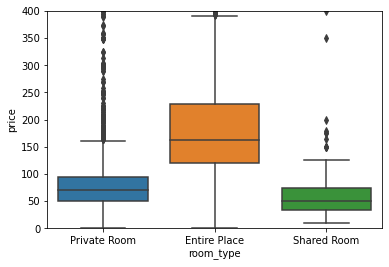

In [118]:
# Visualize relationship between price and room_type
sns.boxplot(x = 'room_type', y = 'price', data = airbnb)
plt.ylim(0,400)
plt.show()

In [119]:
# Get median price per room_type
airbnb.groupby('room_type').median()['price']

room_type
Entire Place    163.0
Private Room     70.0
Shared Room      50.0
Name: price, dtype: float64

In [0]:
# Impute price based on conditions
airbnb.loc[(airbnb['price'].isna()) & (airbnb['room_type'] == 'Entire Place'), ['price']] = 163.0
airbnb.loc[(airbnb['price'].isna()) & (airbnb['room_type'] == 'Private Room'), ['price']] = 70.0
airbnb.loc[(airbnb['price'].isna()) & (airbnb['room_type'] == 'Shared Room'), ['price']] = 50.0

In [121]:
# Confirm price has been imputed
airbnb.isna().sum()

listing_id              0
name                    5
host_id                 0
host_name               2
room_type               0
price                   0
number_of_reviews       0
last_review          2075
reviews_per_month       0
availability_365        0
rating               2075
number_of_stays         0
5_stars                 0
listing_added           0
latitude                0
longitude               0
borough                 0
neighbourhood           0
is_rated                0
dtype: int64

_Further Steps_

There are still a couple of problems yet to be diagnosed. When cleaning data, we need to consider:

- Values that do not make any sense *(for example: are there values of `last_review` that older than `listing_added`? Are there listings in the future?*)
- Presence of duplicates values - and how to deal with them?

##### **Task 8:** Do we have consistent date data?

In [122]:
# Doing some sanity checks on date data
today = dt.date.today()
today

datetime.date(2020, 4, 13)

In [123]:
# Are there reviews in the future?
airbnb[airbnb['last_review'].dt.date > today]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood,is_rated


In [124]:
# Are there listings in the future?
airbnb[airbnb['listing_added'].dt.date > today]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood,is_rated
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,Private Room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354,Manhattan,Lower East Side,1
124,28659894,Private bedroom in prime Bushwick! Near Trains!!!,216235179,Nina,Private Room,55.0,4,2019-04-12,0.58,358,4.916252,4.8,0.703117,2020-08-23,40.69988,-73.92072,Brooklyn,Bushwick,1
511,33619855,Modern & Spacious in trendy Crown Heights,253354074,Yehudis,Entire Place,150.0,6,2019-05-27,2.50,148,3.462432,7.2,0.610929,2020-10-07,40.66387,-73.93840,Brooklyn,Crown Heights,1
521,25317793,Awesome Cozy Room in The Heart of Sunnyside!,136406167,Kara,Private Room,65.0,22,2019-06-11,1.63,131,4.442485,26.4,0.722388,2020-10-22,40.74090,-73.92696,Queens,Sunnyside,1


In [0]:
# Drop these rows since they are only 4 rows
airbnb = airbnb[~(airbnb['listing_added'].dt.date > today)]

In [126]:
# Are there any listings with listing_added > last_review
incosistent_dates = airbnb[airbnb['listing_added'].dt.date > airbnb['last_review'].dt.date]
incosistent_dates

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood,is_rated
50,20783900,Marvelous Manhattan Marble Hill Private Suites,148960265,Randy,Private Room,93.0,7,2018-10-06,0.32,0,4.868036,8.4,0.609263,2020-02-17,40.87618,-73.91266,Manhattan,Marble Hill,1
60,1908852,Oversized Studio By Columbus Circle,684629,Alana,Entire Place,189.0,7,2016-05-06,0.13,0,4.841204,8.4,0.725995,2017-09-17,40.77060,-73.98919,Manhattan,Upper West Side,1


In [0]:
# Drop these rows since they are only 2 rows
airbnb.drop(incosistent_dates.index, inplace=True)

##### **Task 9:** Let's deal with duplicate data


There are two notable types of duplicate data:

- Identical duplicate data across all columns
- Identical duplicate data cross most or some columns

To diagnose, and deal with duplicate data, we will be using the following methods and functions:

- `.duplicated(subset = , keep = )`
  - `subset` lets us pick one or more columns with duplicate values.
  - `keep` returns lets us return all instances of duplicate values.
- `.drop_duplicates(subset = , keep = )`
  

In [128]:
# Print the header of the DataFrame again
airbnb.head()

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood,is_rated
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,Private Room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398,Brooklyn,Flatlands,1
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,Entire Place,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862,Manhattan,Upper West Side,1
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,Entire Place,150.0,0,NaT,0.00,65,NaN,0.0,0.000000,2018-08-15,40.70070,-73.99517,Brooklyn,Brooklyn Heights,0
3,6425850,"Spacious, charming studio",32715865,Yelena,Entire Place,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498,Manhattan,Upper West Side,1
5,271954,Beautiful brownstone apartment,1423798,Aj,Entire Place,150.0,203,2019-06-20,2.22,300,4.478396,243.6,0.743500,2018-12-15,40.73388,-73.99452,Manhattan,Greenwich Village,1


In [129]:
# Find duplicates
duplicates = airbnb.duplicated(subset='listing_id', keep=False)
print(duplicates)

0        False
1        False
2        False
3        False
5        False
         ...  
10014    False
10015    False
10016    False
10017    False
10018    False
Length: 10010, dtype: bool


In [130]:
# Find duplicates
airbnb[duplicates].sort_values('listing_id')

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood,is_rated
1145,253806,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Entire Place,199.0,43,2019-07-02,0.47,60,4.620238,51.6,0.861086,2018-12-27,40.73652,-73.95236,Brooklyn,Greenpoint,1
6562,253806,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Entire Place,199.0,43,2019-07-02,0.47,60,4.620238,51.6,0.861086,2018-12-27,40.73652,-73.95236,Brooklyn,Greenpoint,1
8699,2044392,The heart of Williamsburg 2 bedroom,620218,Sarah,Entire Place,245.0,0,NaT,0.00,0,NaN,0.0,0.000000,2018-08-09,40.71257,-73.96149,Brooklyn,Williamsburg,0
5761,2044392,The heart of Williamsburg 2 bedroom,620218,Sarah,Entire Place,250.0,0,NaT,0.00,0,NaN,0.0,0.000000,2018-05-24,40.71257,-73.96149,Brooklyn,Williamsburg,0
4187,4244242,Best Bedroom in Bedstuy/Bushwick. Ensuite bath...,22023014,BrooklynSleeps,Private Room,73.0,110,2019-06-23,1.96,323,4.962314,132.0,0.809882,2018-12-18,40.69496,-73.93949,Brooklyn,Bedford-Stuyvesant,1
2871,4244242,Best Bedroom in Bedstuy/Bushwick. Ensuite bath...,22023014,BrooklynSleeps,Private Room,70.0,110,2019-06-23,1.96,323,4.962314,132.0,0.809882,2018-12-18,40.69496,-73.93949,Brooklyn,Bedford-Stuyvesant,1
77,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,Entire Place,289.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,40.73813,-73.98098,Manhattan,Kips Bay,1
2255,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,Entire Place,280.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,40.73813,-73.98098,Manhattan,Kips Bay,1
555,9078222,"Prospect Park 3 bdrm, Sleeps 8 (#2)",47219962,Babajide,Entire Place,154.0,123,2019-07-01,2.74,263,3.466881,147.6,0.738191,2018-12-26,40.66086,-73.96159,Brooklyn,Prospect-Lefferts Gardens,1
7933,9078222,"Prospect Park 3 bdrm, Sleeps 8 (#2)",47219962,Babajide,Entire Place,150.0,123,2019-07-01,2.74,263,3.466881,147.6,0.738191,2018-12-26,40.66086,-73.96159,Brooklyn,Prospect-Lefferts Gardens,1


In [0]:
# Remove identical duplicates
airbnb = airbnb.drop_duplicates()

In [0]:
# Find non-identical duplicates
duplicates = airbnb.duplicated(subset='listing_id', keep = False)

In [133]:
# Show all duplicates
airbnb[duplicates].sort_values('listing_id')

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood,is_rated
5761,2044392,The heart of Williamsburg 2 bedroom,620218,Sarah,Entire Place,250.0,0,NaT,0.00,0,NaN,0.0,0.000000,2018-05-24,40.71257,-73.96149,Brooklyn,Williamsburg,0
8699,2044392,The heart of Williamsburg 2 bedroom,620218,Sarah,Entire Place,245.0,0,NaT,0.00,0,NaN,0.0,0.000000,2018-08-09,40.71257,-73.96149,Brooklyn,Williamsburg,0
2871,4244242,Best Bedroom in Bedstuy/Bushwick. Ensuite bath...,22023014,BrooklynSleeps,Private Room,70.0,110,2019-06-23,1.96,323,4.962314,132.0,0.809882,2018-12-18,40.69496,-73.93949,Brooklyn,Bedford-Stuyvesant,1
4187,4244242,Best Bedroom in Bedstuy/Bushwick. Ensuite bath...,22023014,BrooklynSleeps,Private Room,73.0,110,2019-06-23,1.96,323,4.962314,132.0,0.809882,2018-12-18,40.69496,-73.93949,Brooklyn,Bedford-Stuyvesant,1
77,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,Entire Place,289.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,40.73813,-73.98098,Manhattan,Kips Bay,1
2255,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,Entire Place,280.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,40.73813,-73.98098,Manhattan,Kips Bay,1
555,9078222,"Prospect Park 3 bdrm, Sleeps 8 (#2)",47219962,Babajide,Entire Place,154.0,123,2019-07-01,2.74,263,3.466881,147.6,0.738191,2018-12-26,40.66086,-73.96159,Brooklyn,Prospect-Lefferts Gardens,1
7933,9078222,"Prospect Park 3 bdrm, Sleeps 8 (#2)",47219962,Babajide,Entire Place,150.0,123,2019-07-01,2.74,263,3.466881,147.6,0.738191,2018-12-26,40.66086,-73.96159,Brooklyn,Prospect-Lefferts Gardens,1
1481,15027024,Newly renovated 1bd on lively & historic St Marks,8344620,Ethan,Entire Place,180.0,10,2018-12-31,0.30,0,3.969729,12.0,0.772513,2018-06-27,40.72693,-73.98385,Manhattan,East Village,1
3430,15027024,Newly renovated 1bd on lively & historic St Marks,8344620,Ethan,Entire Place,180.0,10,2018-12-31,0.30,0,3.869729,12.0,0.772513,2018-06-27,40.72693,-73.98385,Manhattan,East Village,1


To treat identical duplicates across some columns, we will chain the `.groupby()` and `.agg()` methods where we group by the column used to find duplicates (`listing_id`) and aggregate across statistical measures for `price`, `rating` and `list_added`. The `.agg()` method takes in a dictionary with each column's aggregation method - we will use the following aggregations:

- `mean` for `price` and `rating` columns
- `max` for `listing_added` column
- `first` for all remaining column

*A note on dictionary comprehensions:*

Dictionaries are useful data structures in Python with the following format
`my_dictionary = {key: value}` where a `key` is mapped to a `value` and whose `value` can be returned with `my_dictionary[key]` - dictionary comprehensions allow us to programmatically create dicitonaries using the structure:

```
{x: x*2 for x in [1,2,3,4,5]} 
{1:2, 2:4, 3:6, 4:8, 5:10}
```

In [134]:
# Get column names from airbnb
column_names = airbnb.columns
column_names

Index(['listing_id', 'name', 'host_id', 'host_name', 'room_type', 'price',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'availability_365', 'rating', 'number_of_stays', '5_stars',
       'listing_added', 'latitude', 'longitude', 'borough', 'neighbourhood',
       'is_rated'],
      dtype='object')

In [137]:
# Create dictionary comprehension with 'first' as value for all columns not being aggregated
aggregations = {column:'first' for column in column_names.difference(['listing_id', 'price', 'rating', 'listing_added'])}
aggregations['price'] = 'mean'
aggregations['listing_added'] = 'max'
aggregations['rating'] = 'mean'
aggregations

{'5_stars': 'first',
 'availability_365': 'first',
 'borough': 'first',
 'host_id': 'first',
 'host_name': 'first',
 'is_rated': 'first',
 'last_review': 'first',
 'latitude': 'first',
 'listing_added': 'max',
 'longitude': 'first',
 'name': 'first',
 'neighbourhood': 'first',
 'number_of_reviews': 'first',
 'number_of_stays': 'first',
 'price': 'mean',
 'rating': 'mean',
 'reviews_per_month': 'first',
 'room_type': 'first'}

In [0]:
# Remove non-identical duplicates
airbnb = airbnb.groupby('listing_id').agg(aggregations).reset_index()

In [139]:
# Make sure no duplication happened
airbnb[airbnb.duplicated('listing_id', keep=False)]

,listing_id,5_stars,availability_365,borough,host_id,host_name,is_rated,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,number_of_stays,reviews_per_month,room_type,price,listing_added,rating


In [140]:
# Print header of DataFrame
airbnb.head()

,listing_id,5_stars,availability_365,borough,host_id,host_name,is_rated,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,number_of_stays,reviews_per_month,room_type,price,listing_added,rating
0,3831,0.757366,194,Brooklyn,4869,LisaRoxanne,1,2019-07-05,40.68514,-73.95976,Cozy Entire Floor of Brownstone,Clinton Hill,270,324.0,4.64,Entire Place,89.0,2018-12-30,3.273935
1,6848,0.789743,46,Brooklyn,15991,Allen & Irina,1,2019-06-29,40.70837,-73.95352,Only 2 stops to Manhattan studio,Williamsburg,148,177.6,1.20,Entire Place,140.0,2018-12-24,3.495760
2,7322,0.669873,12,Manhattan,18946,Doti,1,2019-07-01,40.74192,-73.99501,Chelsea Perfect,Chelsea,260,312.0,2.12,Private Room,140.0,2018-12-26,4.389051
3,7726,0.640251,21,Brooklyn,20950,Adam And Charity,1,2019-06-22,40.67592,-73.94694,Hip Historic Brownstone Apartment with Backyard,Crown Heights,53,63.6,4.44,Entire Place,99.0,2018-12-17,3.305382
4,12303,0.918593,311,Brooklyn,47618,Yolande,1,2018-09-30,40.69673,-73.97584,1bdr w private bath. in lofty apt,Fort Greene,25,30.0,0.23,Private Room,120.0,2018-03-27,4.568745


- What is the average price of listings by borough? Visualize your results with a bar plot!
- What is the average availability in days of listings by borough? Visualize your results with a bar plot!
- What is the median price per room type in each borough? Visualize your results with a bar plot!
- Visualize the number of listings over time.

**Functions to be used:**
- `.groupby()` and `.agg()`
- `sns.barplot(x = , y = , hue = , data = )`
- `sns.lineplot(x = , y = , data = )`
- `.dt.strftime()` for extracting specific dates from a `datetime` column


In [157]:
borough_price_mean = airbnb.groupby('borough').agg('mean')['price']
borough_price_mean

borough
Bronx             88.628821
Brooklyn         122.959735
Manhattan        192.334273
Queens            96.952542
Staten Island     91.890411
Name: price, dtype: float64

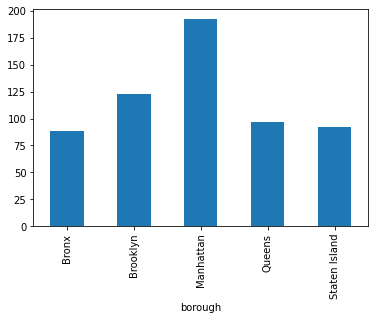

In [151]:
borough_price_mean.plot(kind='bar')

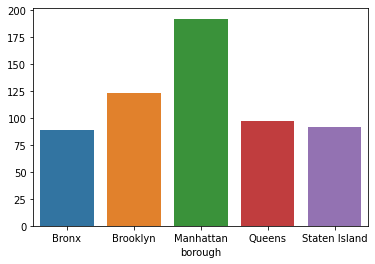

In [160]:
sns.barplot(x=borough_price_mean.index, y=borough_price_mean.values)
plt.show()

In [188]:
borough_days_mean = airbnb.groupby('borough')['availability_365'].agg('mean').reset_index()
borough_days_mean

,borough,availability_365
0,Bronx,146.716157
1,Brooklyn,99.483182
2,Manhattan,112.233822
3,Queens,143.862712
4,Staten Island,214.205479


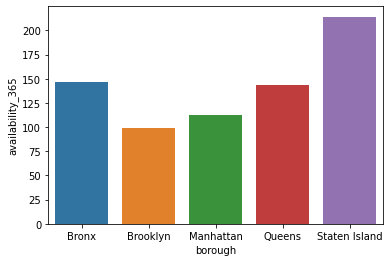

In [189]:
sns.barplot(x='borough', y='availability_365', data=borough_days_mean)
plt.show()

In [185]:
borough_roomtype_mean = airbnb.groupby(['borough', 'room_type'], as_index=False)['price'].agg('median')
borough_roomtype_mean

,borough,room_type,price
0,Bronx,Entire Place,99.0
1,Bronx,Private Room,55.0
2,Bronx,Shared Room,31.5
3,Brooklyn,Entire Place,149.0
4,Brooklyn,Private Room,65.0
5,Brooklyn,Shared Room,38.0
6,Manhattan,Entire Place,193.0
7,Manhattan,Private Room,85.0
8,Manhattan,Shared Room,65.0
9,Queens,Entire Place,120.0


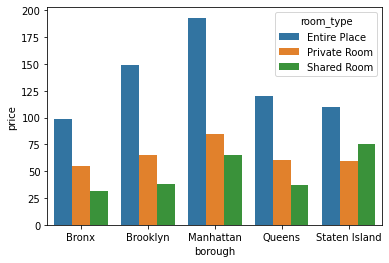

In [186]:
sns.barplot(x='borough', y='price', hue='room_type', data=borough_roomtype_mean)
plt.show()

In [0]:
year = airbnb.listing_added.dt.strftime("%Y")
airbnb['year'] = year

In [199]:
listing_per_year = airbnb.groupby('year')['listing_id'].agg('count').reset_index()
listing_per_year

,year,listing_id
0,2010,2
1,2011,2
2,2012,6
3,2013,17
4,2014,76
5,2015,443
6,2016,587
7,2017,822
8,2018,7866
9,2019,169


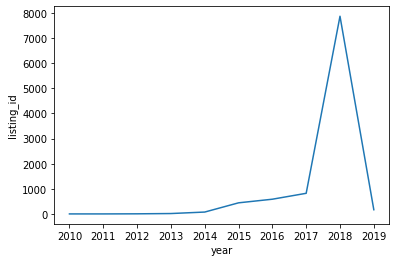

In [200]:
sns.lineplot(x='year',y='listing_id',data=listing_per_year)
plt.show()